### Generate by ChatGPT

The provided code performs data analysis by calculating the probability of default for a given set of observations. The technique used for this analysis is maximum likelihood estimation. The intuition behind the usage of maximum likelihood estimation is that it is a common method for estimating the parameters of a statistical model. In this case, the parameters are the probabilities of default for different sets of observations. Maximum likelihood estimation seeks to find the parameter values that maximize the likelihood function for the observed data.

The code first reads in a CSV file using Pandas. It then creates two lists, x and y, that correspond to the 'observation' and 'rank' columns in the data, respectively. These lists are then used to calculate the default and total values for each rank in the data.

The log-likelihood function is defined to calculate the likelihood of a given set of parameters. The likelihood function is used to calculate the probability of observing the data given the parameter values. The code then initializes a three-dimensional array, dp, that is used to store the calculated log-likelihood values for different sets of observations. The first dimension represents the number of iterations performed, the second dimension represents the rank of the observation, and the third dimension represents the log-likelihood and the index of the previous observation.

Finally, the code calculates the log-likelihood for the given data set by using the dp array. It then prints the results and outputs the indices of the observations that were used in the calculation.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('/content/Task 3 and 4_Loan_Data.csv')
df.head(10)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
5,4661159,0,5376.886873,7189.121298,85529.84591,2,697,0
6,8291909,1,3634.057471,7085.980095,68691.57707,6,722,0
7,4616950,4,3302.172238,13067.570210,50352.16821,3,545,1
8,3395789,0,2938.325123,1918.404472,53497.37754,4,676,0
9,4045948,0,5396.366774,5298.824524,92349.55399,2,447,0


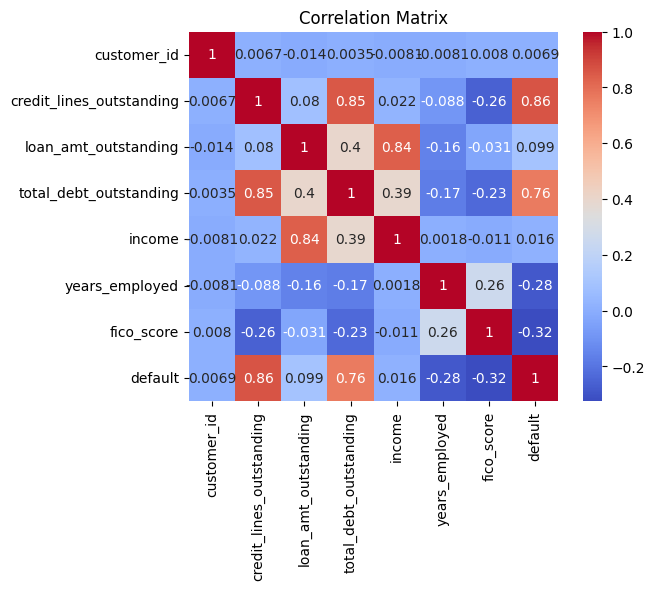

In [4]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [8]:
x = df['default'].to_list()
x

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [9]:
y = df['fico_score'].to_list()
y

[605,
 572,
 602,
 612,
 631,
 697,
 722,
 545,
 676,
 447,
 640,
 636,
 527,
 638,
 616,
 644,
 606,
 727,
 627,
 581,
 667,
 480,
 677,
 726,
 596,
 605,
 636,
 642,
 596,
 667,
 580,
 697,
 542,
 668,
 787,
 673,
 609,
 541,
 560,
 607,
 631,
 746,
 530,
 615,
 552,
 606,
 599,
 679,
 603,
 764,
 736,
 751,
 610,
 663,
 737,
 629,
 689,
 587,
 692,
 706,
 515,
 702,
 638,
 612,
 583,
 720,
 607,
 750,
 662,
 563,
 611,
 754,
 663,
 709,
 576,
 611,
 669,
 612,
 720,
 589,
 578,
 652,
 687,
 633,
 569,
 657,
 754,
 642,
 708,
 627,
 745,
 685,
 679,
 697,
 603,
 555,
 687,
 625,
 581,
 633,
 622,
 610,
 584,
 628,
 724,
 620,
 563,
 678,
 602,
 672,
 724,
 626,
 749,
 582,
 693,
 632,
 655,
 693,
 721,
 710,
 541,
 587,
 581,
 572,
 706,
 582,
 710,
 705,
 672,
 568,
 511,
 640,
 709,
 707,
 651,
 662,
 766,
 692,
 590,
 657,
 592,
 718,
 720,
 636,
 654,
 513,
 587,
 671,
 655,
 609,
 641,
 621,
 658,
 594,
 622,
 636,
 603,
 619,
 646,
 533,
 672,
 598,
 726,
 641,
 669,
 556,
 659

In [10]:
n = len(x)

In [7]:
default = [0 for i in range(851)]
total = [0 for i in range(851)]

In [14]:
for i in range(n):
  y[i] = int(y[i])
  # here, we are subtracting 300 for indexing because
  # fico score = (300, 850]
  default[y[i]-300] += x[i]
  total[y[i]-300] += 1

for i in range(0, 551):
  default[i] += default[i-1]
  total[i] += total[i-1]

In [15]:
def log_likelihood(n, k):
  p = k/n
  if(p==0 or p==1):
    return 0
  return k*np.log(p) + (n-k)*np.log(1-p)

In [16]:
r = 10
dp = [[[-10**18, 0] for i in range(551)] for j in range(r+1)]
'''
dp is 3D vector used to store the calculate values of log_likelihood
- 1D: number of iteration performed
- 2D: rank of obervation
- 3D: log_likelihood and index of prev_obs
'''

'\ndp is 3D vector used to store the calculate values of log_likelihood\n- 1D: number of iteration performed \n- 2D: rank of obervation\n- 3D: log_likelihood and index of prev_obs\n'

In [17]:
# idk what is happening below -_-

for i in range(r+1):
    for j in range(551):
        if (i==0):
            dp[i][j][0] = 0
        else:
            for k in range(j):
                if (total[j]==total[k]):
                    continue
                if (i==1):
                    dp[i][j][0] = log_likelihood(total[j], default[j])
                else:
                    if (dp[i][j][0] < (dp[i-1][k][0] + log_likelihood(total[j]-total[k], default[j] - default[k]))):
                        dp[i][j][0] = log_likelihood(total[j]-total[k], default[j]-default[k]) + dp[i-1][k][0]
                        dp[i][j][1] = k

print (round(dp[r][550][0], 4))


-12653.4734


In [18]:
k = 550
l = []
while r >= 0:
    l.append(k+300)
    k = dp[r][k][1]
    r -= 1

print(l)

[850, 753, 752, 732, 696, 649, 611, 580, 552, 520, 300]
